## Dataset

### preprocessing

In [2]:
import torch
print(torch.__version__)

1.0.1


In [3]:
from IPython.core.debugger import set_trace
from torch.utils.data import DataLoader, Dataset
import csv
import pandas as pd
def load_data(data_path):

    data_input = []
    data_output = []
    #df = pd.df
    with open(data_path, 'r') as f:
        rdr = csv.reader(f, delimiter=',', quotechar='"')
        for index, row in enumerate(rdr):
            if int(row[0]) < 8:
                data_output.append(int(row[0]))
                txt = ""
                for s in row[1:]:
                    txt = txt + " " + s.replace("\\", " ")
                txt = txt.lower() 
                data_input.append(txt[1:])

    return data_input, data_output

In [11]:
train_X, train_y = load_data("./data/ag_news_csv/train.csv")
test_X, test_y = load_data("./data/ag_news_csv/test.csv")

In [12]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size = 0.15)

In [13]:
len(train_X), len(train_y), len(valid_X), len(valid_y), len(test_X), len(test_y)

(102000, 102000, 18000, 18000, 7600, 7600)

In [14]:
train_df = pd.DataFrame(data={'text': train_X, 'label': train_y}, columns=['text', 'label'])
valid_df = pd.DataFrame(data={'text': valid_X, 'label': valid_y}, columns=['text', 'label'])
test_df = pd.DataFrame(data={'text': test_X, 'label': test_y}, columns=['text', 'label'])

train_df.to_csv('./data/ag_news_csv/preprocessed_train.csv', index=False)
valid_df.to_csv('./data/ag_news_csv/preprocessed_valid.csv', index=False)
test_df.to_csv('./data/ag_news_csv/preprocessed_test.csv', index=False)

train_df.tail()

,text,label
101995,"for arafat, his life personified his dream for...",1
101996,"stocks climb; retail sales, oracle help new y...",3
101997,press row: pundits praise pedro com. pedro mar...,2
101998,"kerik's position was untenable, bush aide says...",1
101999,"ups to hire 70,000 workers for holidays (reute...",3


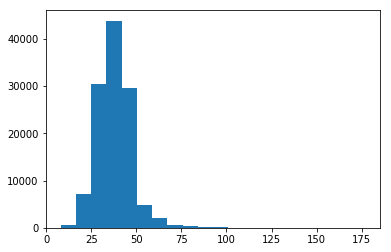

In [8]:
l = [len(row.split()) for row in train_X]
import matplotlib.pyplot as plt
plt.hist(l, bins=20)
plt.show()

In [15]:
set(train_y)

{1, 2, 3, 4}

In [26]:
set(pd.read_csv('./data/ag_news_csv/preprocessed_test.csv').label)

{1, 2, 3, 4}